In [1]:
# paraPropPython example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp            # This is the original version of the code
import paraPropPythonNew as pppn     # Used to test new Q operator apporximations
import numpy as np
import matplotlib.pyplot as plt
import util as util

In [2]:
##### steady state example #####

### first, initialize an instance of paraProp by defining its dimensions and frequency of interest ###
iceDepth = 75. # m
iceLength = 100. # m
dx = 0.08 # m
dz = 0.08 # m

freq = 0.1 # frequency in GHz

### it is useful to set the reference depth as the source depth when you only have one transmitter ###
sourceDepth = 9.9 # m
deltasource = False # If true, dipole source is like a delta function. If false, dipole source has a sin^2 pattern.
sim = ppp.paraProp(iceLength, iceDepth, dx, dz, refDepth=sourceDepth)
simn = pppn.paraProp(iceLength, iceDepth, dx, dz, refDepth=sourceDepth)

### useful arrays for plottinng ###
z = sim.get_z()
x = sim.get_x()

zn = simn.get_z()
xn = simn.get_x()

1250
1422 1423


/Users/leodeer/Desktop/Research Portfolio/RET/ParaPropImprovements/Code/paraPropPython.py:251: ComplexWarning: Casting complex values to real discards the imaginary part
  self.n[i,:] = nFunc(z)
/Users/leodeer/Desktop/Research Portfolio/RET/ParaPropImprovements/Code/paraPropPythonNew.py:522: ComplexWarning: Casting complex values to real discards the imaginary part
  self.n[i,:] = nFunc(z)


-25.0


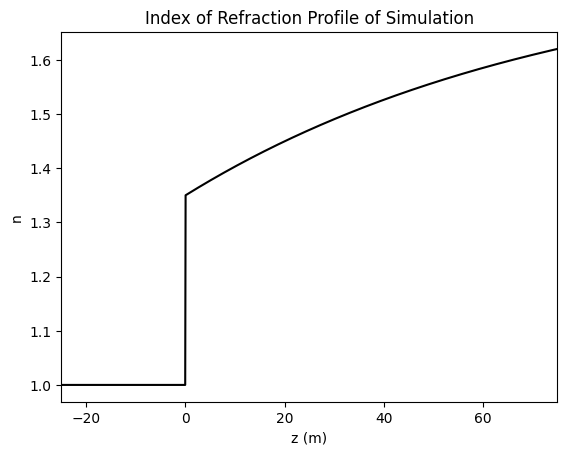

In [3]:
### NOTE: define n before defining source ###

### an example of defining n and its first two derivatives as a function of z 
### (also can be done using a vector, see implementation) 
def southpole(z):
    A=1.78
    B=-0.43
    C=-0.0132
    return A+B*np.exp(C*z)

def southpole(zn):
    A=complex(1.78,0)
    B=complex(-0.43,0)
    C=complex(-0.0132,0)
    return A+B*np.exp(C*zn)

def southpole_p(zn):
    A=1.78
    B=-0.43
    C=-0.0132
    return C*B*np.exp(C*zn)

def southpole_p_p(zn):
    A=1.78
    B=-0.43
    C=-0.0132
    return C*C*B*np.exp(C*zn)

sim.set_n(nFunc=southpole)
simn.set_n(nFunc=southpole, nprFunc=southpole_p, nprprFunc=southpole_p_p)

### plot ###
plt.plot(z, simn.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])
print(z[0])

plt.show()

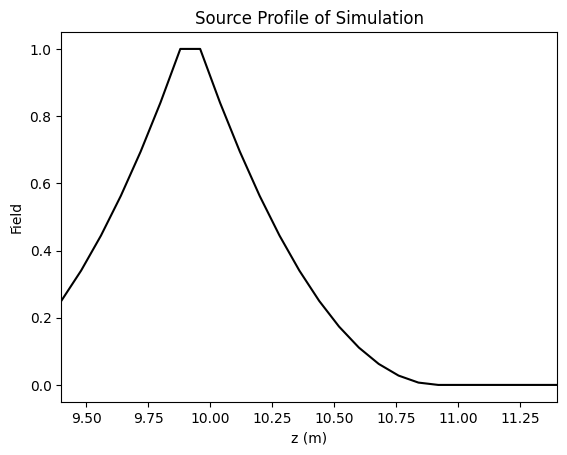

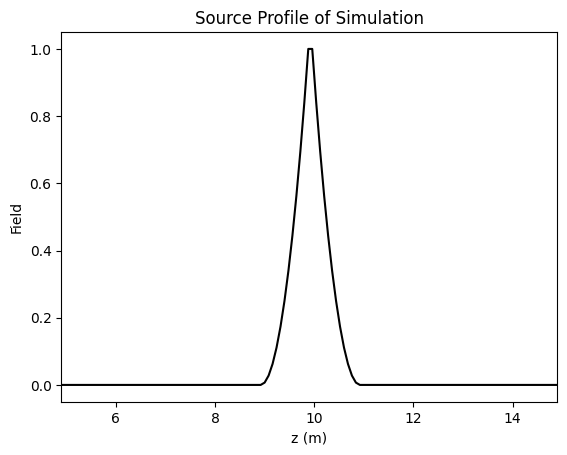

In [4]:
### an example of defining the source as a dipole ###

### first we define the delta funciton source with a vector
dipoleDepth_64 = sourceDepth
dipoleDepth = float(dipoleDepth_64) 

arraySize = round(iceDepth - sourceDepth)
sourceArray = []
for i in range(int(round(arraySize/dz))):
    sourceArray.append(0)
sourceArray[int(round(dipoleDepth)/dz-1)] = 1 
sourceArray[int(round(dipoleDepth)/dz-2)] = 1 

if deltasource == True:
    sim.set_user_source_profile('vector', z0=0, sVec=sourceArray, sFunc=None)
    simn.set_user_source_profile('vector', z0=0, sVec=sourceArray, sFunc=None)
else:
    sim.set_dipole_source_profile(freq, sourceDepth)
    simn.set_dipole_source_profile(freq, sourceDepth)

### plot, zoomed in ###
plt.plot(z, abs(sim.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 0.5, sourceDepth + 1.5)
plt.show()

plt.plot(z, abs(simn.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 5, sourceDepth + 5)
plt.show()


### set a cw signal ###
sim.set_cw_source_signal(freq)
simn.set_cw_source_signal(freq)

In [5]:
### run the solver ###
sim.do_solver()
simn.do_solver()

PP_Dipole = abs(sim.get_field())
PP_Dipolen = abs(simn.get_field())
absdiffPP = abs(sim.get_field()-simn.get_field())
diffabsPP = abs(sim.get_field())-abs(simn.get_field())

k0 [2.93958192+0.j]
len(kz) 4096


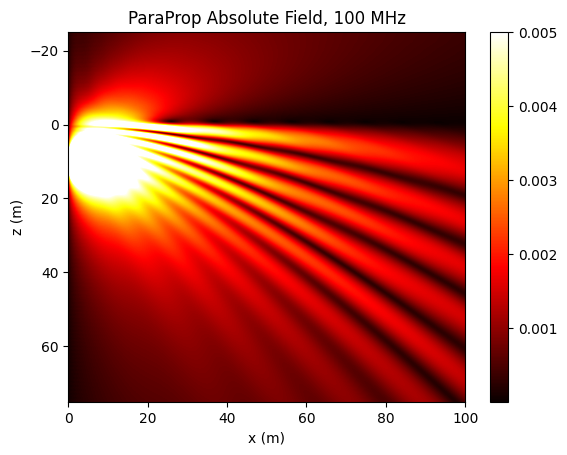

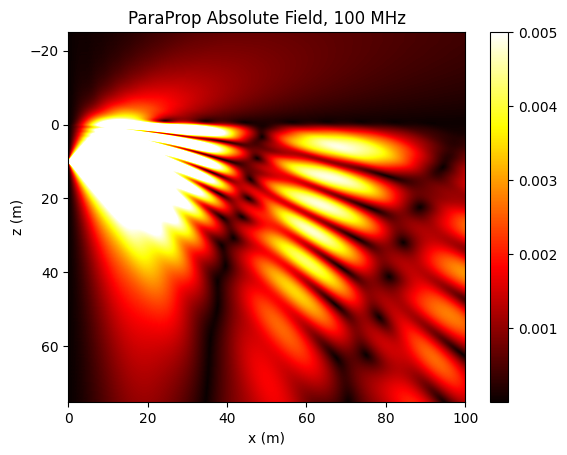

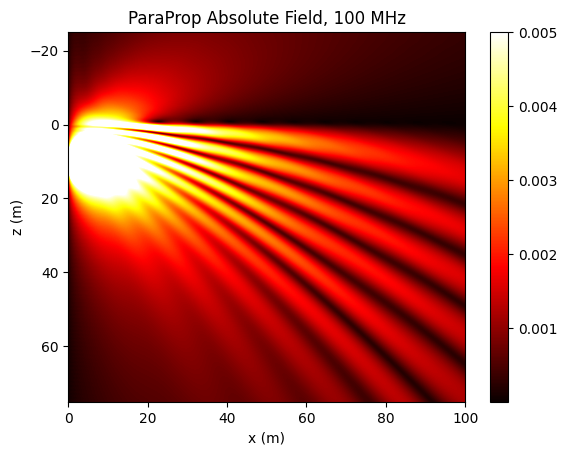

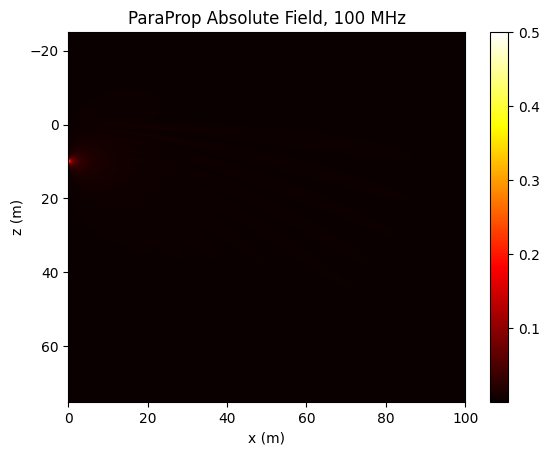

In [6]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(PP_Dipolen), aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-3, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("ParaProp Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(absdiffPP), aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-3, 
          extent=(xn[0], xn[-1], zn[-1], zn[0]))
plt.colorbar()
plt.title("ParaProp Absolute Field, " + str(int(freq.real*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(PP_Dipole), aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-3, 
          extent=(xn[0], xn[-1], zn[-1], zn[0]))
plt.colorbar()
plt.title("ParaProp Absolute Field, " + str(int(freq.real*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(PP_Dipolen), aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-1, 
          extent=(xn[0], xn[-1], zn[-1], zn[0]))
plt.colorbar()
plt.title("ParaProp Absolute Field, " + str(int(freq.real*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

In [7]:
# the array is saved in the file geekfile.npy 
Meep_Dipole = np.load('MeepDipoleNoErRes12_5.npy')


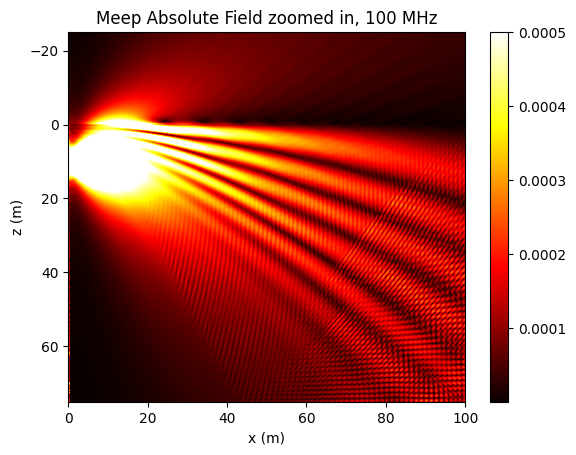

In [8]:
plt.imshow(Meep_Dipole, aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-4, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("Meep Absolute Field zoomed in, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
#plt.ylim(12,9)
#plt.xlim(0,3)
plt.show()

In [9]:
# This ensure the field arrays are the same size.
#PP_Dipole = [[PP_Dipole[i,j] for i in range(int(len(Meep_Dipole[0])))] for j in range(int(len(Meep_Dipole)))]
#PP_Dipolen = [[PP_Dipolen[i,j] for i in range(int(len(Meep_Dipole[0])))] for j in range(int(len(Meep_Dipole)))]
PP_Dipole = [[PP_Dipole[i,j] for i in range(int(len(Meep_Dipole[0])))] for j in range(int(len(Meep_Dipole)))]
PP_Dipolen = [[PP_Dipolen[i,j] for i in range(int(len(Meep_Dipole[0])))] for j in range(int(len(Meep_Dipole)))]

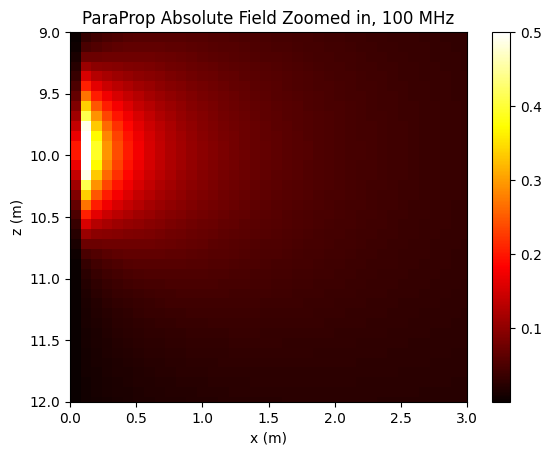

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(PP_Dipolen, aspect='auto', cmap='hot',  vmin=1e-6, vmax=5e-1, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("ParaProp Absolute Field Zoomed in, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.ylim(12,9)
plt.xlim(0,3)
plt.show()

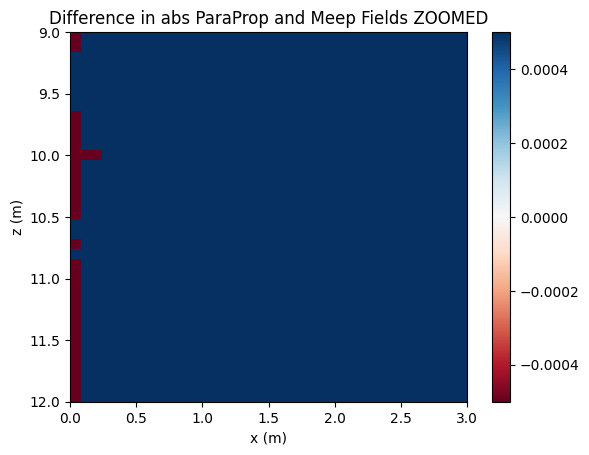

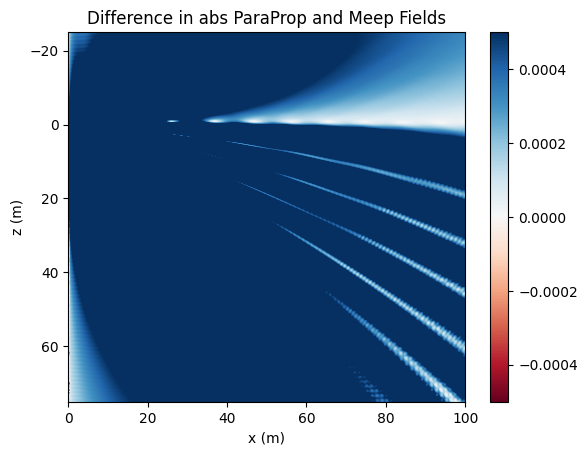

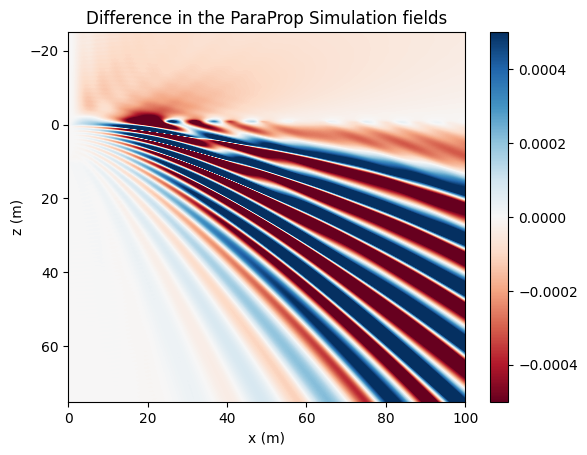

In [11]:
diff = PP_Dipolen - abs(Meep_Dipole)   #Meep is positive
absdiff = np.transpose(abs(sim.get_field())-abs(simn.get_field()))

diffabs = np.transpose(sim.get_field().real-simn.get_field().real)

fig1 = plt.figure()

plt.imshow(diff, aspect='auto', cmap='RdBu', vmin=-5e-4, vmax=5e-4,
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("Difference in abs ParaProp and Meep Fields ZOOMED")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.ylim(12,9)
plt.xlim(0,3)
plt.show()
#fig1.savefig('Absdiff_n_dx_0_1.png')

plt.imshow(diff, aspect='auto', cmap='RdBu',  vmin=-5e-4, vmax=5e-4, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("Difference in abs ParaProp and Meep Fields")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()
#fig1.savefig('Absdiff_n_dx_0_1.png')

fig2 = plt.figure()

plt.imshow(absdiff, aspect='auto', cmap='RdBu',  vmin=-5e-4, vmax=5e-4, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.colorbar()
plt.title("Difference in the ParaProp Simulation fields")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()
#fig2.savefig('DiffAbs_n_dx_0_1.png')

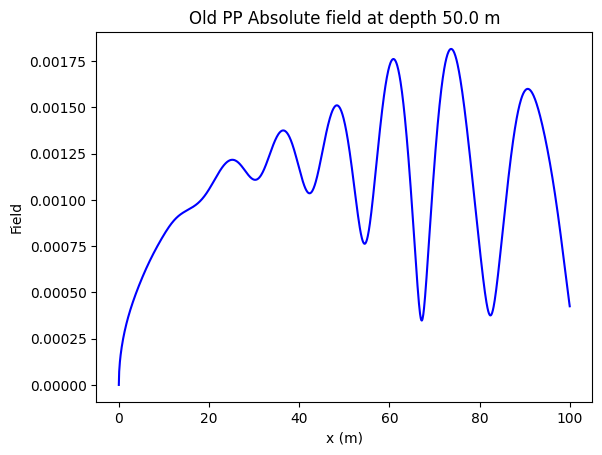

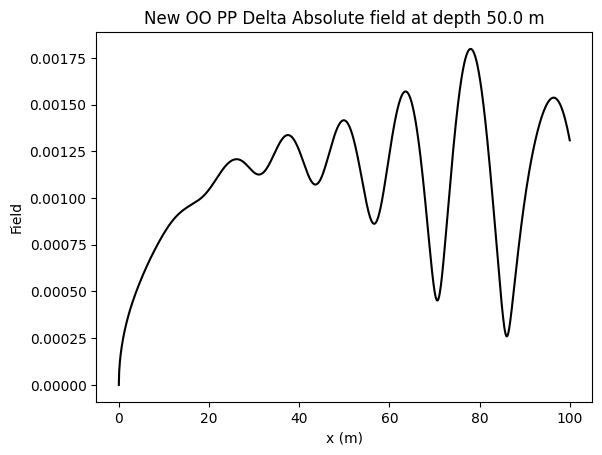

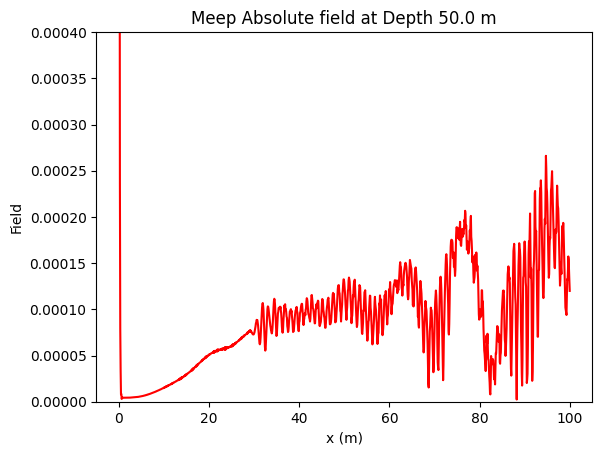

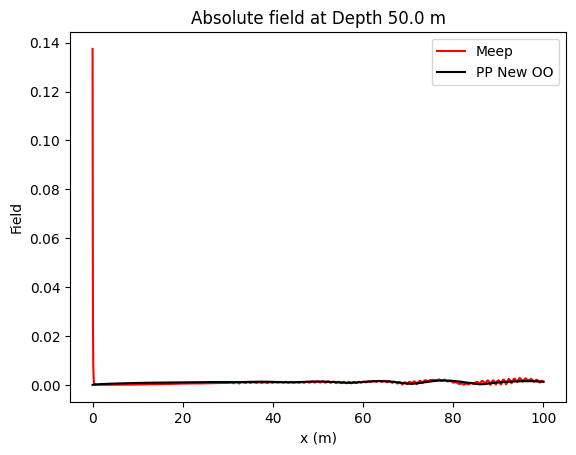

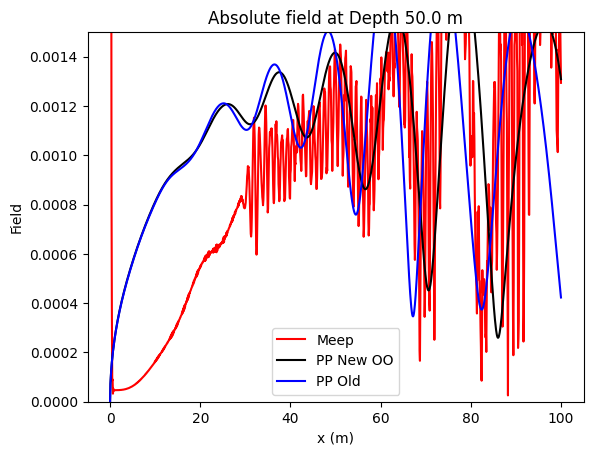

In [12]:
### plot absolute value of field for horizontal slice of simulation ###

z0 = 50. #DEPTH OF SLICE

indexz = int((z0+25.)/dz)

plt.plot(x, PP_Dipole[indexz], color='blue', label='PP Old')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Old PP Absolute field at depth " + str(z0) + " m" )
plt.show()

plt.plot(x, PP_Dipolen[indexz], color='black', label='PP New OO')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("New OO PP Delta Absolute field at depth " + str(z0) + " m" )
plt.show()

plt.plot(x, abs(Meep_Dipole[indexz]), color='red', label='Meep')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Meep Absolute field at Depth " + str(z0) + " m" )
plt.ylim(0,0.0004)
plt.show()

norm_factormp = np.sum(PP_Dipolen[indexz])/np.sum(abs(Meep_Dipole[indexz]))
#print(type(norm_factorpp))
norm_factorpp = float(np.sum(PP_Dipolen[indexz])/np.sum(PP_Dipole[indexz]))

plt.plot(x, norm_factormp*abs(Meep_Dipole[indexz]), color='red', label='Meep')
plt.plot(x, PP_Dipolen[indexz], color='black', label='PP New OO')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at Depth " + str(z0) + " m" )
plt.show()

fig = plt.figure()

plt.plot(x, norm_factormp*abs(Meep_Dipole[indexz]), color='red', label='Meep')
plt.plot(x, PP_Dipolen[indexz], color='black', label='PP New OO')
scaledPP_Dipole = [norm_factorpp * x for x in PP_Dipole[indexz]]
plt.plot(x, scaledPP_Dipole, color='blue', label='PP Old')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.ylim(0.,0.0015)
#plt.xlim(73,76)
plt.title("Absolute field at Depth " + str(z0) + " m" )
plt.show()
#fig.savefig('sinkcompZ75.png')



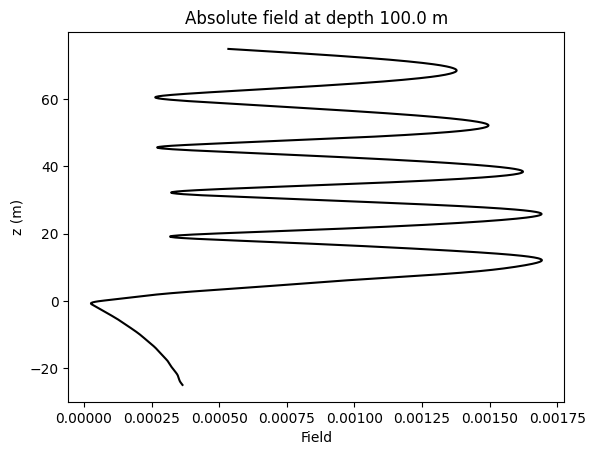

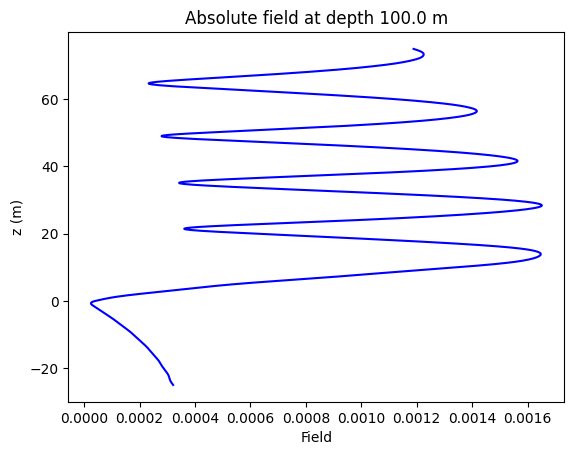

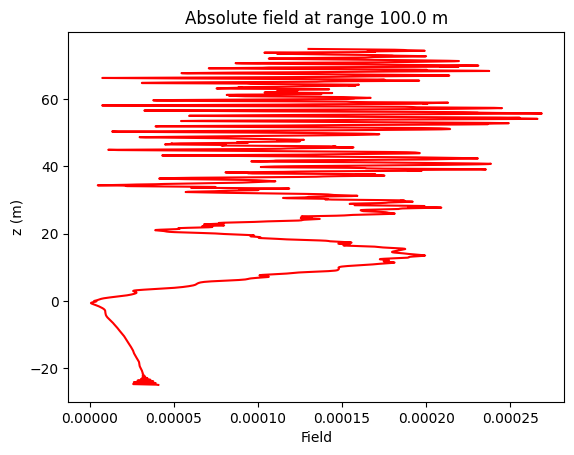

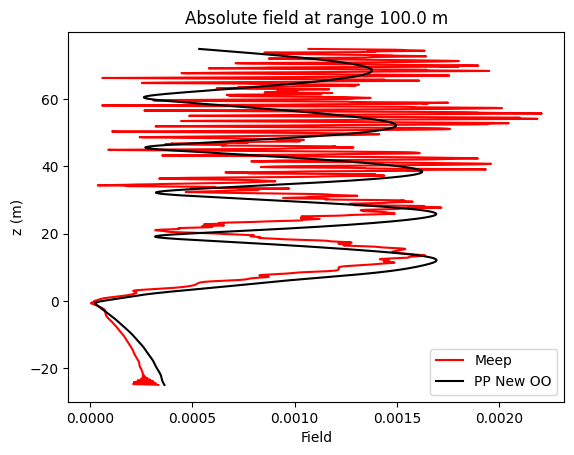

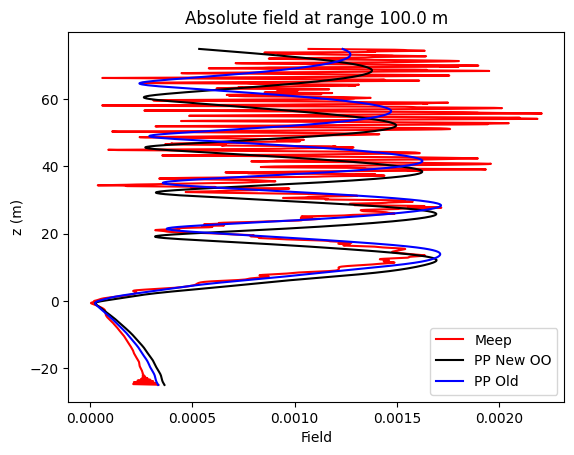

In [13]:
### plot absolute value of field for vertical slice of simulation ###
x0 = 100.

indexx = int(x0/dx)

PP_DipoleT = np.transpose(PP_Dipole)
PP_DipoleTn = np.transpose(PP_Dipolen)
Meep_DipoleT = np.transpose(Meep_Dipole)
z = [z[i] for i in range(len(PP_DipoleT[indexx])) ]

plt.plot(PP_DipoleTn[indexx], z, color='black', label='PP New OO')
plt.ylabel('z (m)')
plt.xlabel('Field')
plt.title("Absolute field at depth " + str(x0) + " m")
plt.show()

plt.plot(PP_DipoleT[indexx], z, color='blue', label='PP Old')
plt.ylabel('z (m)')
plt.xlabel('Field')
plt.title("Absolute field at depth " + str(x0) + " m" )
plt.show()

plt.plot(Meep_DipoleT[indexx], z, color='red', label='Meep')
plt.ylabel('z (m)')
plt.xlabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

norm_factormp = np.sum(PP_DipoleTn[indexx])/np.sum(Meep_DipoleT[indexx])
norm_factorpp = np.sum(PP_DipoleTn[indexx])/np.sum(PP_DipoleT[indexx])

plt.plot(norm_factormp*Meep_DipoleT[indexx], z, color='red', label='Meep')
plt.plot(PP_DipoleTn[indexx], z, color='black', label='PP New OO')
plt.legend()
plt.ylabel('z (m)')
plt.xlabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

fig = plt.figure()
plt.plot(norm_factormp*Meep_DipoleT[indexx], z, color='red', label='Meep')
plt.plot(PP_DipoleTn[indexx], z, color='black', label='PP New OO')
scaledPP_DipoleT = [norm_factorpp * x for x in PP_DipoleT[indexx]]
plt.plot(scaledPP_DipoleT, z, color='blue', label='PP Old')
plt.legend()
plt.ylabel('z (m)')
plt.xlabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()
#fig.savefig('sinkcompX100.png')